In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
df = pd.read_csv("dataset/adult.csv")

In [3]:
#Top 5 records of dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Shape of dataset
df.shape

(32561, 15)

### Data Preprocessing

In [5]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#Statistical Summary of dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#Checking missing values in dataset
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

- We can see that there is no missing values in dataset

In [8]:
#Checking duplicated values in dataset
df.duplicated().sum()

24

In [ ]:
#Now we drop duplicated values from dataset
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

24

In [10]:
#Columns of dataset
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [11]:
#Create categorical features and numerical features
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns= df.select_dtypes(exclude='object').columns

print(categorical_columns)
print()
print(numerical_columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'salary'],
      dtype='object')

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [12]:
#Let's check unique values in each categorical columns
for col in categorical_columns:
  print(col,"\n", df[col].unique())
  print('='*80)

workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship 
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex 
 [' Male' ' Female']
country 
 [' United-States' ' Cuba' ' Jamaica' '

In [13]:
#In workclass, occupation and country features has '?' value 
#So we will replace this value with most frequent value of features.  

In [14]:
df['workclass'].mode()[0]

' Private'

In [15]:
df['occupation'].mode()[0]

' Prof-specialty'

In [16]:
df['country'].mode()[0]

' United-States'

In [17]:
df['workclass'] = df['workclass'].replace(" ?", df['workclass'].mode()[0])
df['occupation'] = df['occupation'].replace(" ?", df['occupation'].mode()[0])
df['country'] = df['country'].replace(" ?", df['country'].mode()[0])

In [18]:
#Let's check unique values in each categorical columns
for col in categorical_columns:
  print(col,"\n", df[col].unique())
  print('='*80)

workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship 
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex 
 [' Male' ' Female']
country 
 [' United-States' ' Cuba' ' Jamaica' ' India' ' 

### EDA

In [19]:
df['salary'].value_counts(normalize= True)

salary
 <=50K    0.75919
 >50K     0.24081
Name: proportion, dtype: float64

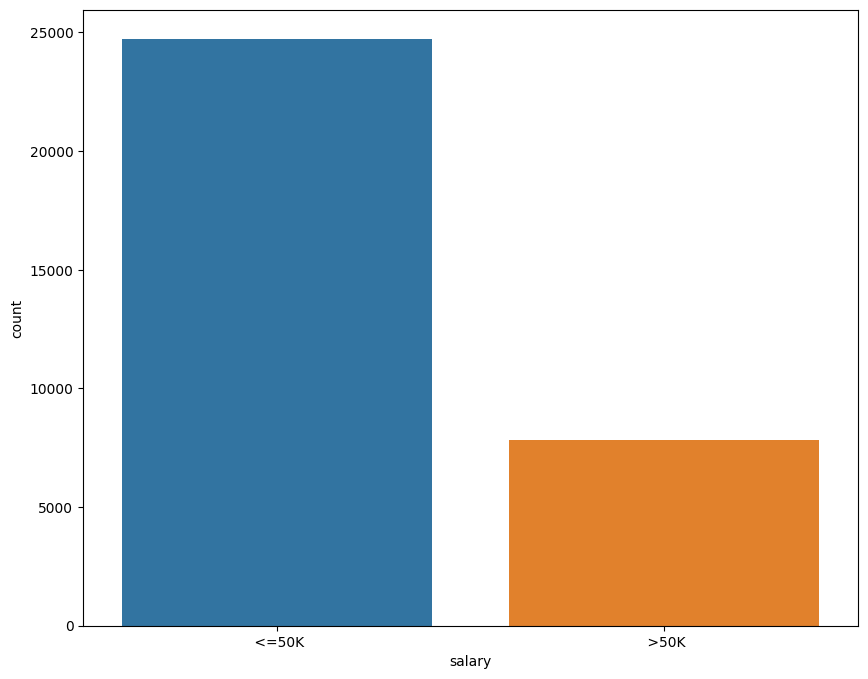

In [20]:
#Salary
plt.figure(figsize= (10, 8))
sns.countplot(x='salary', data =df)
plt.show()

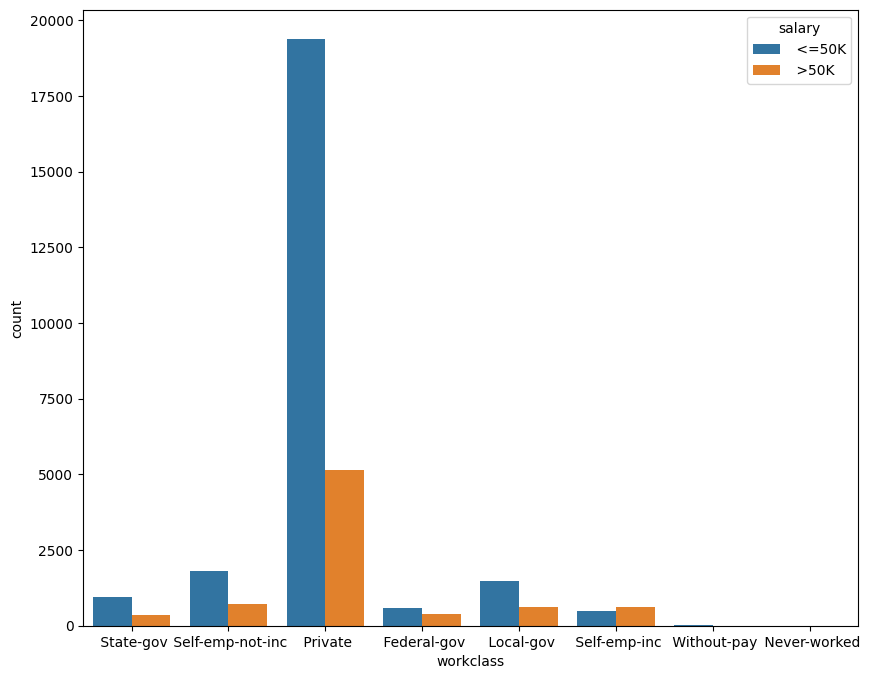

In [22]:
plt.figure(figsize= (10, 8))
sns.countplot(x= 'workclass', hue= 'salary', data =df)
plt.show()

### Observation:- 
 - From the above plot, we can say that in case of private sector, the number of people who earns <=50K are more than the number of people who earns >=50K.
 - Self-employed person has slightly chances getting >=50K salary.
 - Also in state-gov, self-emp-notinc and local-gov sector, the number of people who earns <=50K are slighty more than the number of people who earns >=50K.

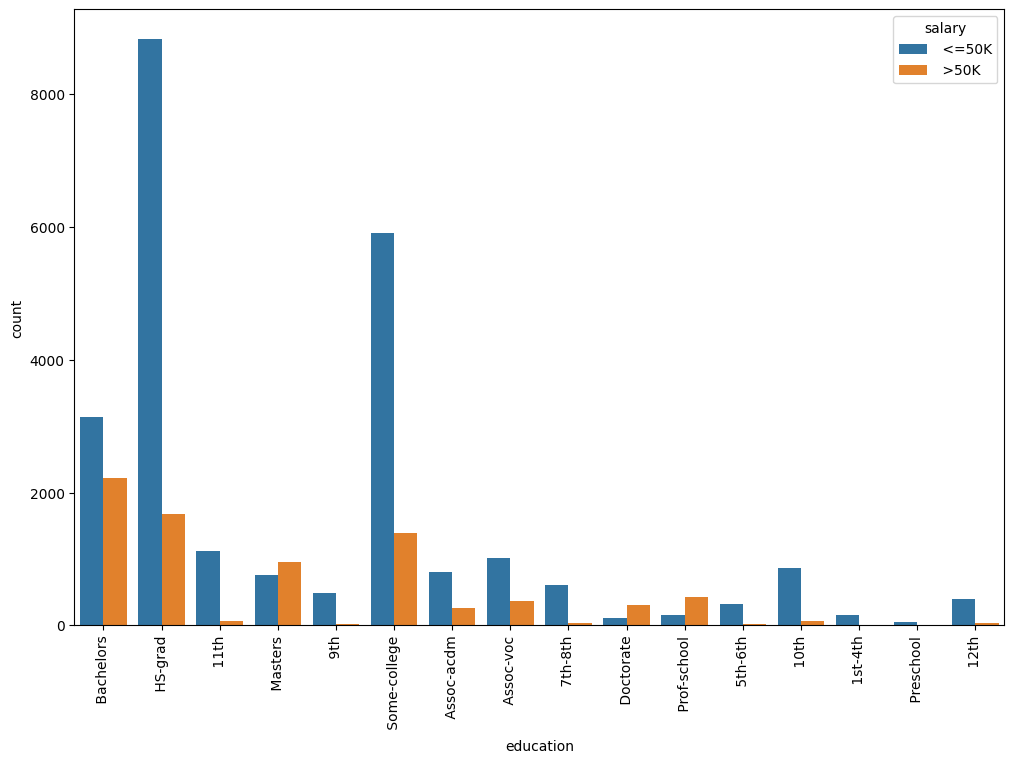

In [23]:
plt.figure(figsize= (12, 8))
sns.countplot(x= 'education', hue= 'salary', data =df)
plt.xticks(rotation= 90)
plt.show()

### Observation:-
 - Here Some-college,Assoc-voc, HS-grad and Bachlelors education, there are more number of people who earns money less than the 50K.
 - In case of Masters, Doctorate and Prof-School education, the number of people who earns >=50K is greater than the number of people who earns <=50K.

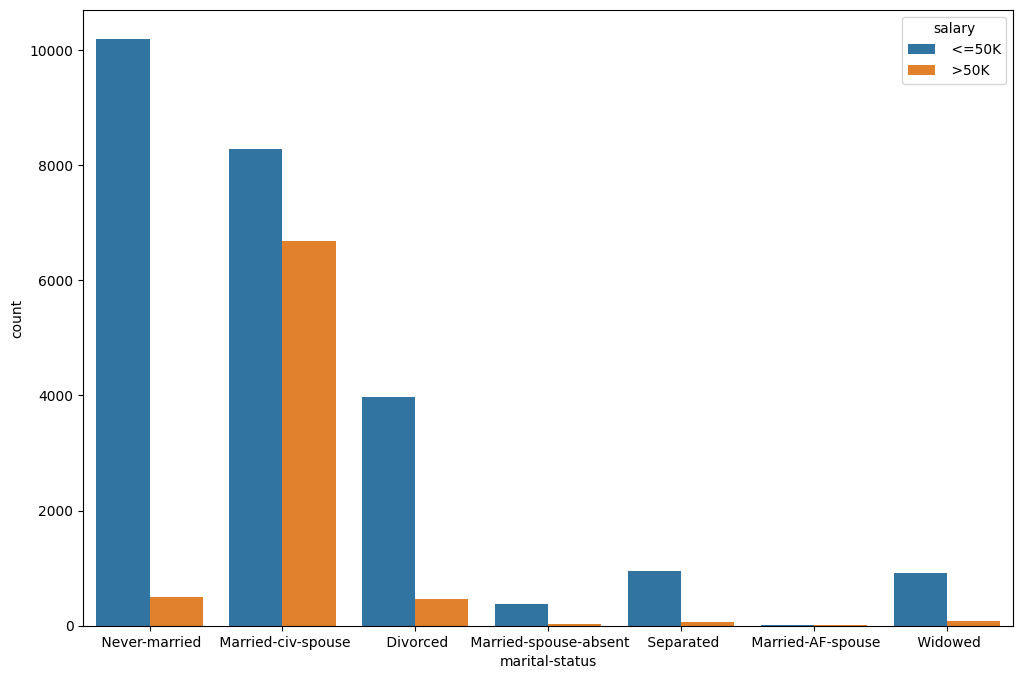

In [25]:
plt.figure(figsize= (12, 8))
sns.countplot(x= 'marital-status', hue= 'salary', data =df)
plt.show()

### Observation:-
 - The count of peoples who are never-marries and divorces earning money <=50K are more.
 - In case of married-civ-spouse marital-status, the count of people who earnning money <=50K and people who earning money >=50K 
 are pretty close to each other.

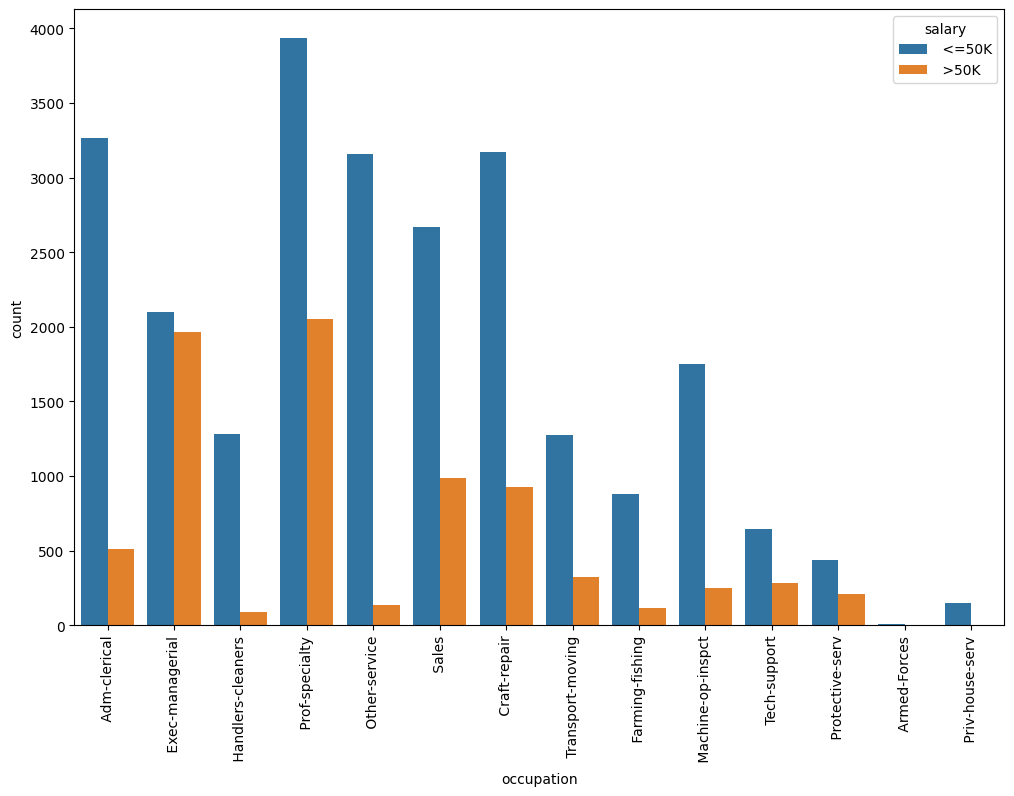

In [26]:
plt.figure(figsize= (12, 8))
sns.countplot(x= 'occupation', hue= 'salary', data =df)
plt.xticks(rotation=90)
plt.show()

### Observation:-
 - Here occupation categories like Adm-clerical, Handlers-clearners, other-service, Transport-moving, Farming-fishing, Machine-op-inspct, Tech-support and Prof-specialty, the number of people who are earning money <=50K are more.
 - In case of Exec-managerial occupation category, the count of people who earns money <=50K and the people who earns money >=50K are pretty close to each other.

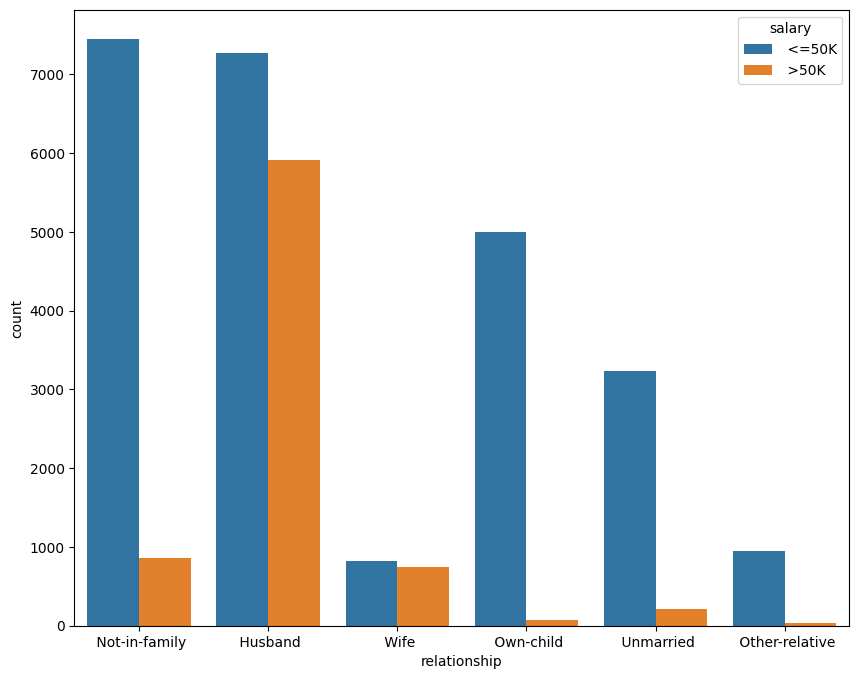

In [27]:
plt.figure(figsize= (10, 8))
sns.countplot(x= 'relationship', hue= 'salary', data =df)
plt.show()

### Observation:-
 - In relationship categories like Not-infamily, Own-child, Unmarries and Other-relative, the number of peoples who are earning money <=50K are more as compared to the peoples who earns >=50K.
 - Husbands like relationship category are more likely to earn <=50K
 - In case of Wife relationship category, the count of earning money <=50K and >=50K are nearly equal to each other.

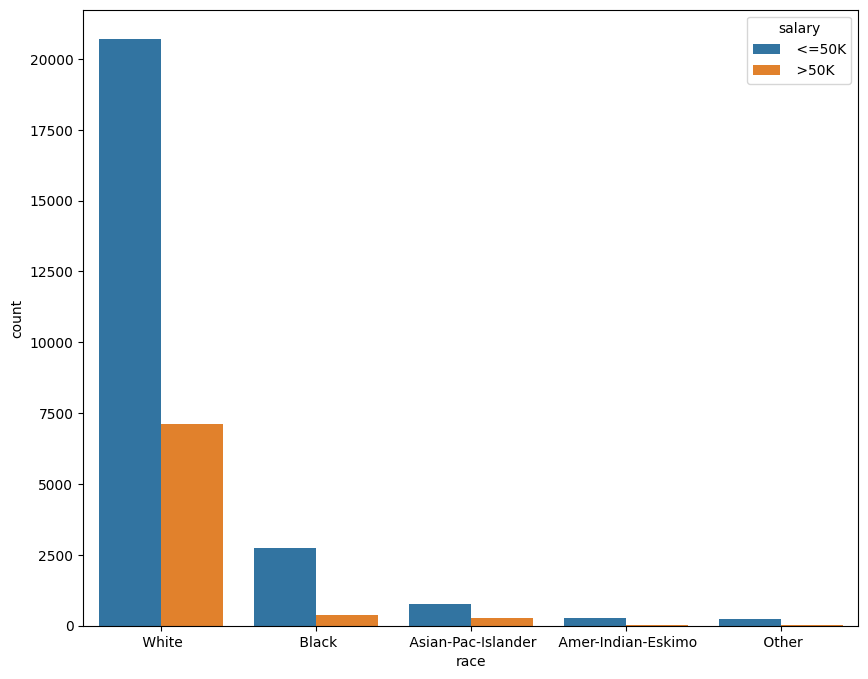

In [28]:
plt.figure(figsize= (10, 8))
sns.countplot(x= 'race', hue= 'salary', data =df)
plt.show()

### Observation:-
 - In race column, the maximum peoples are white.
 - The white peoples who are earning money <=50K are more in number.

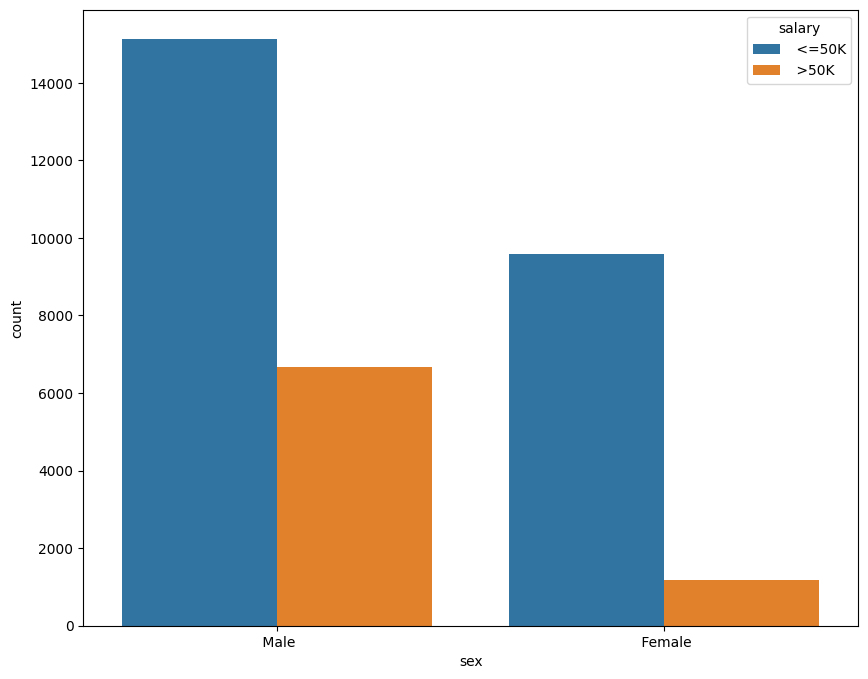

In [29]:
plt.figure(figsize= (10, 8))
sns.countplot(x= 'sex', hue= 'salary', data =df)
plt.show()

### Observation:-
 - The count of male category are more than female category in sex column.
 - Both male and female category who are earning money <=50K are more in numbers.
 - Also males are more likely to earn >50K than females.

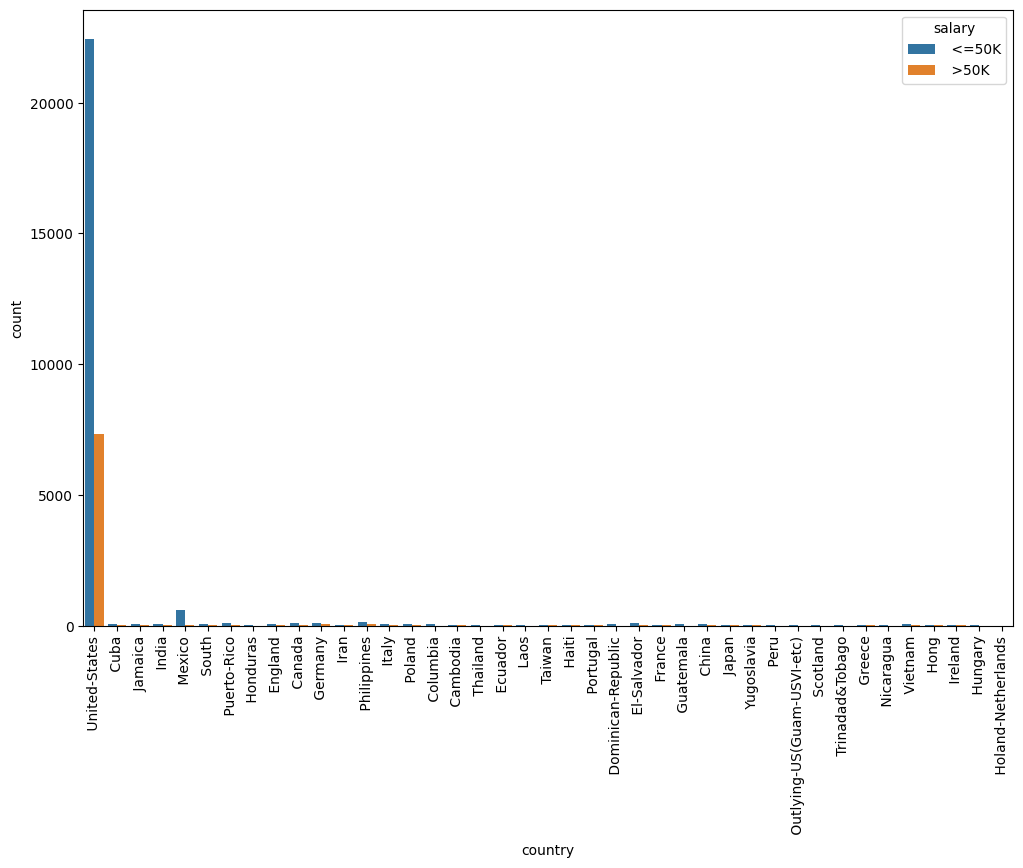

In [30]:
plt.figure(figsize= (12, 8))
sns.countplot(x= 'country', hue= 'salary', data =df)
plt.xticks(rotation= 90)
plt.show()

### Observation:-
 - Most of peoples are from the United-States country.
 - Also peoples who are earning moeny <=50K are more in number than peoples who are earning money >50K.

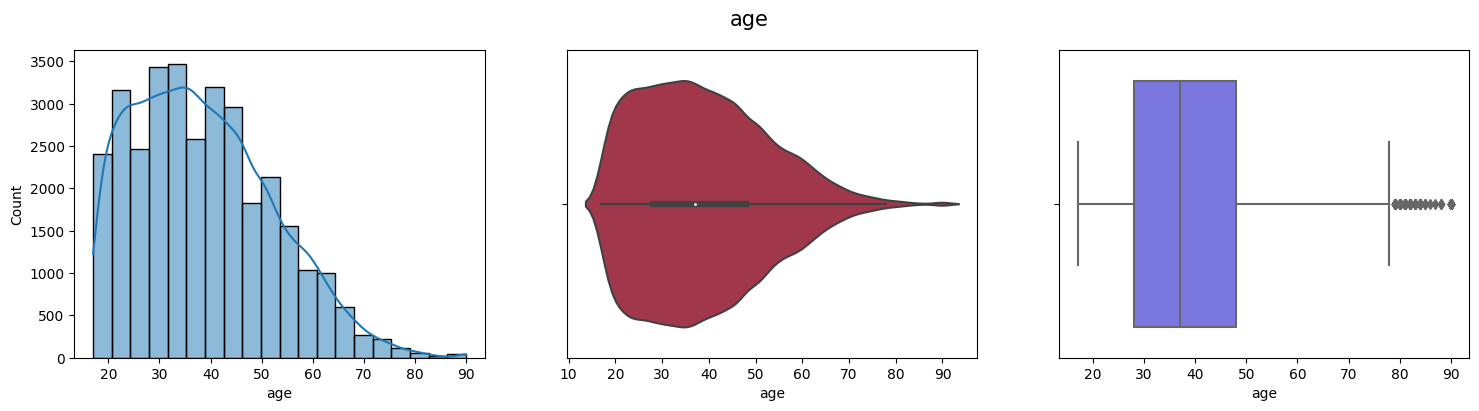

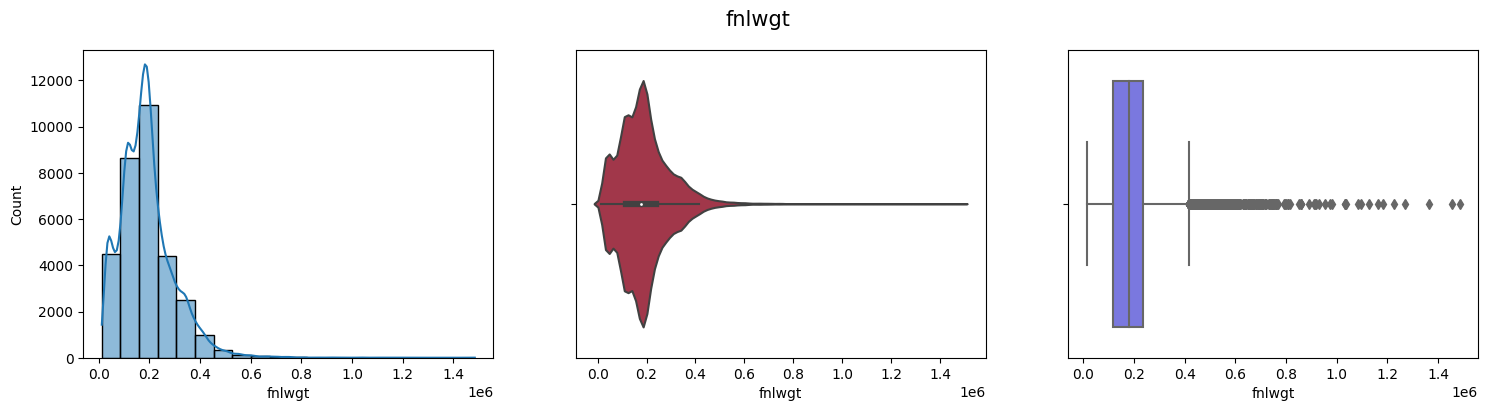

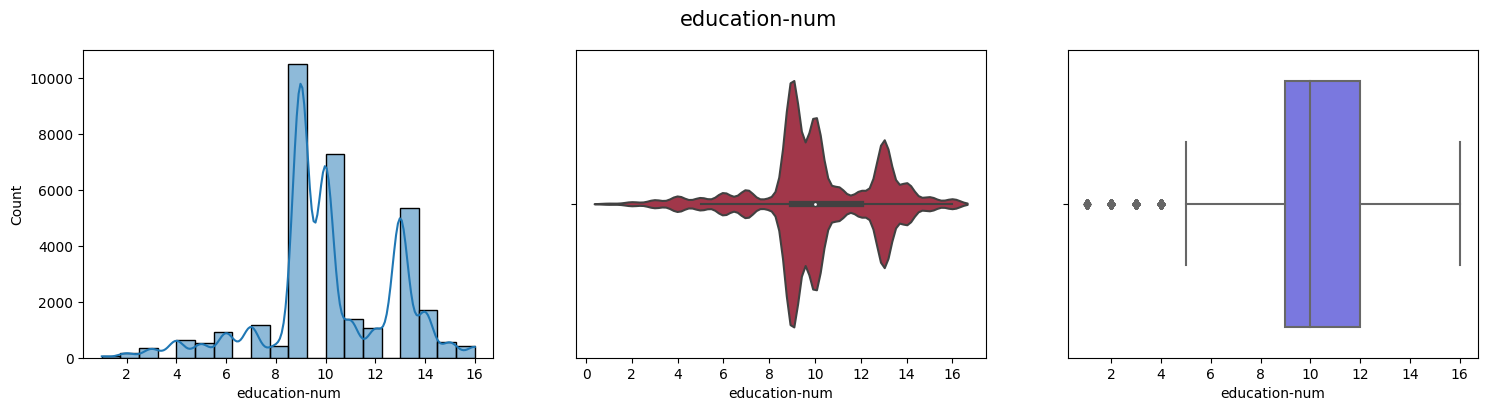

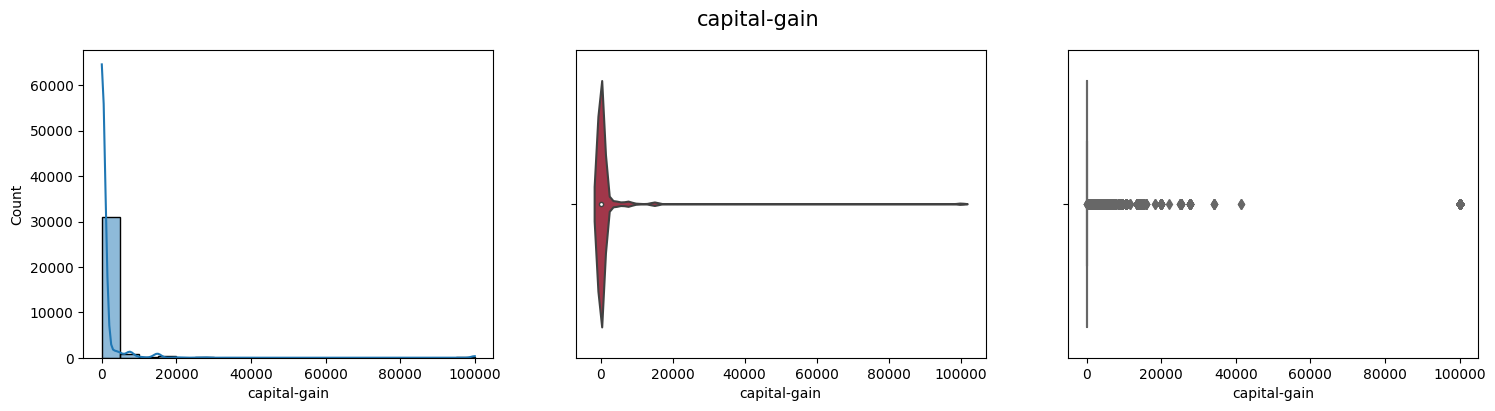

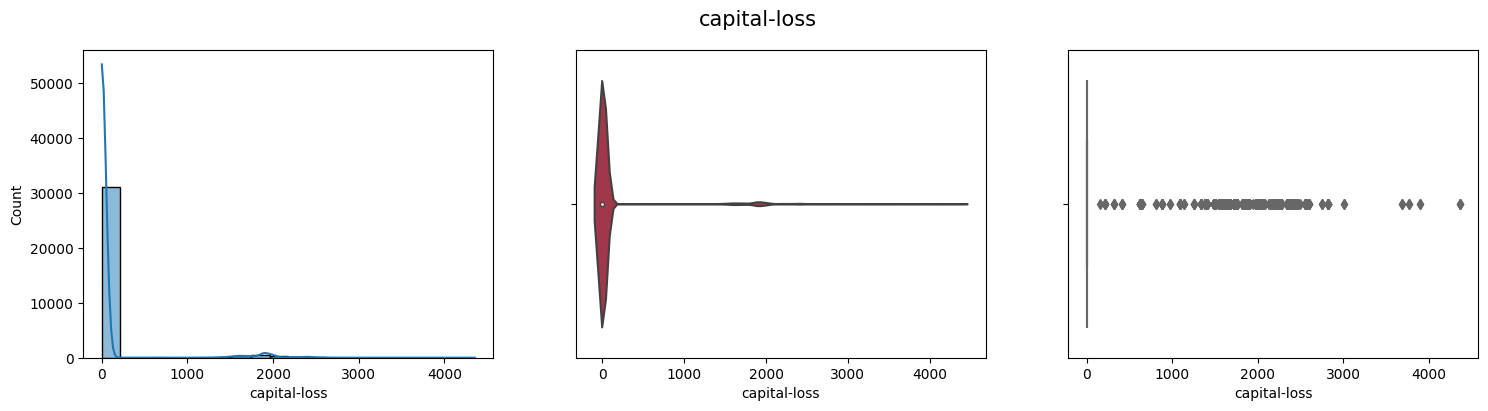

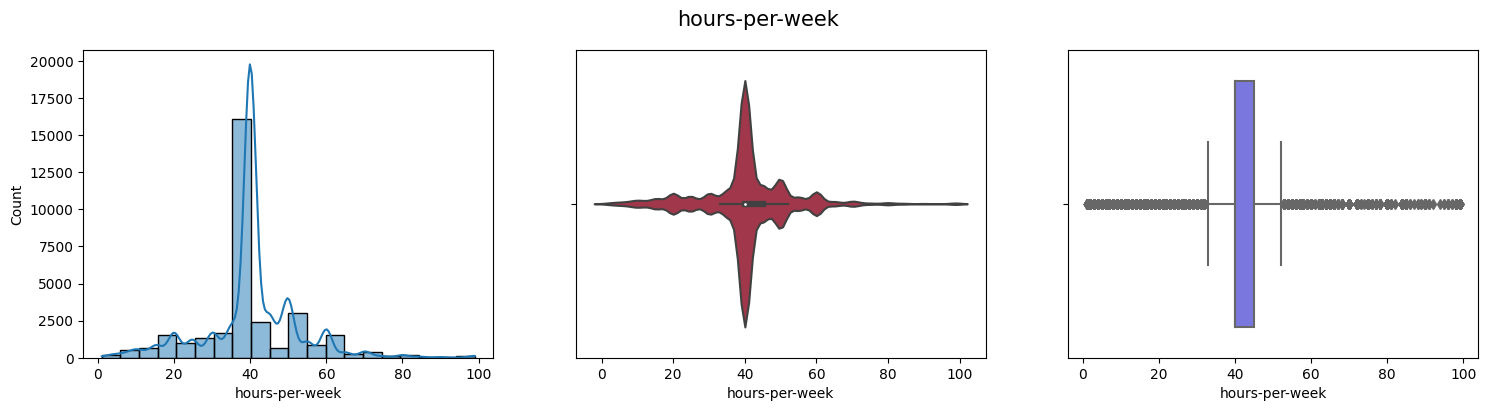

In [31]:
#Now let's plot the numerical features
for col in numerical_columns:
  fig, ax= plt.subplots(1, 3, figsize= (18, 4))
  sns.histplot(x=col, data= df,kde= True, bins=20, ax=ax[0])
  sns.violinplot(x=col, data = df, ax=ax[1],color= '#b3253f')
  sns.boxplot(x=col, data=df, ax=ax[2],color='#6967f0')
  plt.suptitle(f"{col}",size= 15)

### Observation:-
 - The age and fnlwgt features are left skewed features.
 - All the numerical features have outliers.